In [44]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from  scipy.stats import ttest_1samp,pearsonr,spearmanr, chi2_contingency
import statsmodels.api
from itertools import combinations

## Exploratory Data Analysis

### A. Collecting basic insights on the data

In [2]:
df=pd.read_csv("./src/bank.csv")

In [3]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
8588,47,management,married,tertiary,no,6637,yes,no,cellular,17,apr,174,2,-1,0,unknown,no
9844,52,technician,married,secondary,no,136,no,no,cellular,28,aug,88,5,-1,0,unknown,no
10506,48,technician,divorced,tertiary,no,2328,no,no,cellular,27,aug,129,7,-1,0,unknown,no
9861,32,self-employed,married,secondary,no,1942,yes,no,unknown,30,may,84,9,-1,0,unknown,no
4775,34,self-employed,married,tertiary,no,0,no,no,cellular,28,aug,730,11,-1,0,unknown,yes
3947,24,student,single,secondary,no,139,no,no,cellular,9,sep,430,4,-1,0,unknown,yes
7564,38,technician,married,unknown,no,573,yes,no,unknown,6,may,87,1,-1,0,unknown,no
8975,26,admin.,single,secondary,no,-326,yes,no,unknown,19,may,128,3,-1,0,unknown,no
10725,45,services,single,secondary,no,1515,no,no,unknown,20,jun,14,4,-1,0,unknown,no
6160,32,services,single,tertiary,no,785,no,no,cellular,3,jun,273,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
missing_values=pd.DataFrame(df.isna().sum())
missing_values.columns=["Missing Values"]
missing_values

,Missing Values
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [6]:
duplicated=df.duplicated().sum()
print(f"Count of duplicated entries : {duplicated}")

Count of duplicated entries : 0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [8]:
df.describe(include=["object"]).T

,count,unique,top,freq
job,11162,12,management,2566
marital,11162,3,married,6351
education,11162,4,secondary,5476
default,11162,2,no,10994
housing,11162,2,no,5881
loan,11162,2,no,9702
contact,11162,3,cellular,8042
month,11162,12,may,2824
poutcome,11162,4,unknown,8326
deposit,11162,2,no,5873


In [9]:
for col in df.columns:
   distinct=df[col].unique()
   distinct_count=df[col].nunique()
   print(f"\nColumn '{col}'\n----\nCount of distinct values : {distinct_count}\nDistinct values : {distinct}\n")
   print('-----------------------------------------------------------------------------')


Column 'age'
----
Count of distinct values : 76
Distinct values : [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]

-----------------------------------------------------------------------------

Column 'job'
----
Count of distinct values : 12
Distinct values : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

-----------------------------------------------------------------------------

Column 'marital'
----
Count of distinct values : 3
Distinct values : ['married' 'single' 'divorced']

-----------------------------------------------------------------------------

Column 'education'
----
Count of distinct values : 4
Distinct values : ['secondary' 'tertiary' 'primary' 'unknown']

--------------------------

In [10]:
for col in list(df.select_dtypes(include='object')):
  distinct_count=df[col].nunique()
  freq=pd.DataFrame(df[col].value_counts(normalize=True))
  freq['proportion']=(round(freq['proportion']*100,2)).astype(str) + '%'
  print(f"The variable '{col}' contains {distinct_count} distinct values\n\nThe frequencies of these categories are:")
  display(freq)
  print("\n")

The variable 'job' contains 12 distinct values

The frequencies of these categories are:


,proportion
job,
management,22.99%
blue-collar,17.42%
technician,16.33%
admin.,11.95%
services,8.27%
retired,6.97%
self-employed,3.63%
student,3.23%
unemployed,3.2%




The variable 'marital' contains 3 distinct values

The frequencies of these categories are:


,proportion
marital,
married,56.9%
single,31.52%
divorced,11.58%




The variable 'education' contains 4 distinct values

The frequencies of these categories are:


,proportion
education,
secondary,49.06%
tertiary,33.05%
primary,13.44%
unknown,4.45%




The variable 'default' contains 2 distinct values

The frequencies of these categories are:


,proportion
default,
no,98.49%
yes,1.51%




The variable 'housing' contains 2 distinct values

The frequencies of these categories are:


,proportion
housing,
no,52.69%
yes,47.31%




The variable 'loan' contains 2 distinct values

The frequencies of these categories are:


,proportion
loan,
no,86.92%
yes,13.08%




The variable 'contact' contains 3 distinct values

The frequencies of these categories are:


,proportion
contact,
cellular,72.05%
unknown,21.02%
telephone,6.93%




The variable 'month' contains 12 distinct values

The frequencies of these categories are:


,proportion
month,
may,25.3%
aug,13.61%
jul,13.56%
jun,10.95%
nov,8.45%
apr,8.27%
feb,6.95%
oct,3.51%
jan,3.08%




The variable 'poutcome' contains 4 distinct values

The frequencies of these categories are:


,proportion
poutcome,
unknown,74.59%
failure,11.0%
success,9.6%
other,4.81%




The variable 'deposit' contains 2 distinct values

The frequencies of these categories are:


,proportion
deposit,
no,52.62%
yes,47.38%


### B. Dataviz

#### 1. Distribution of every variable

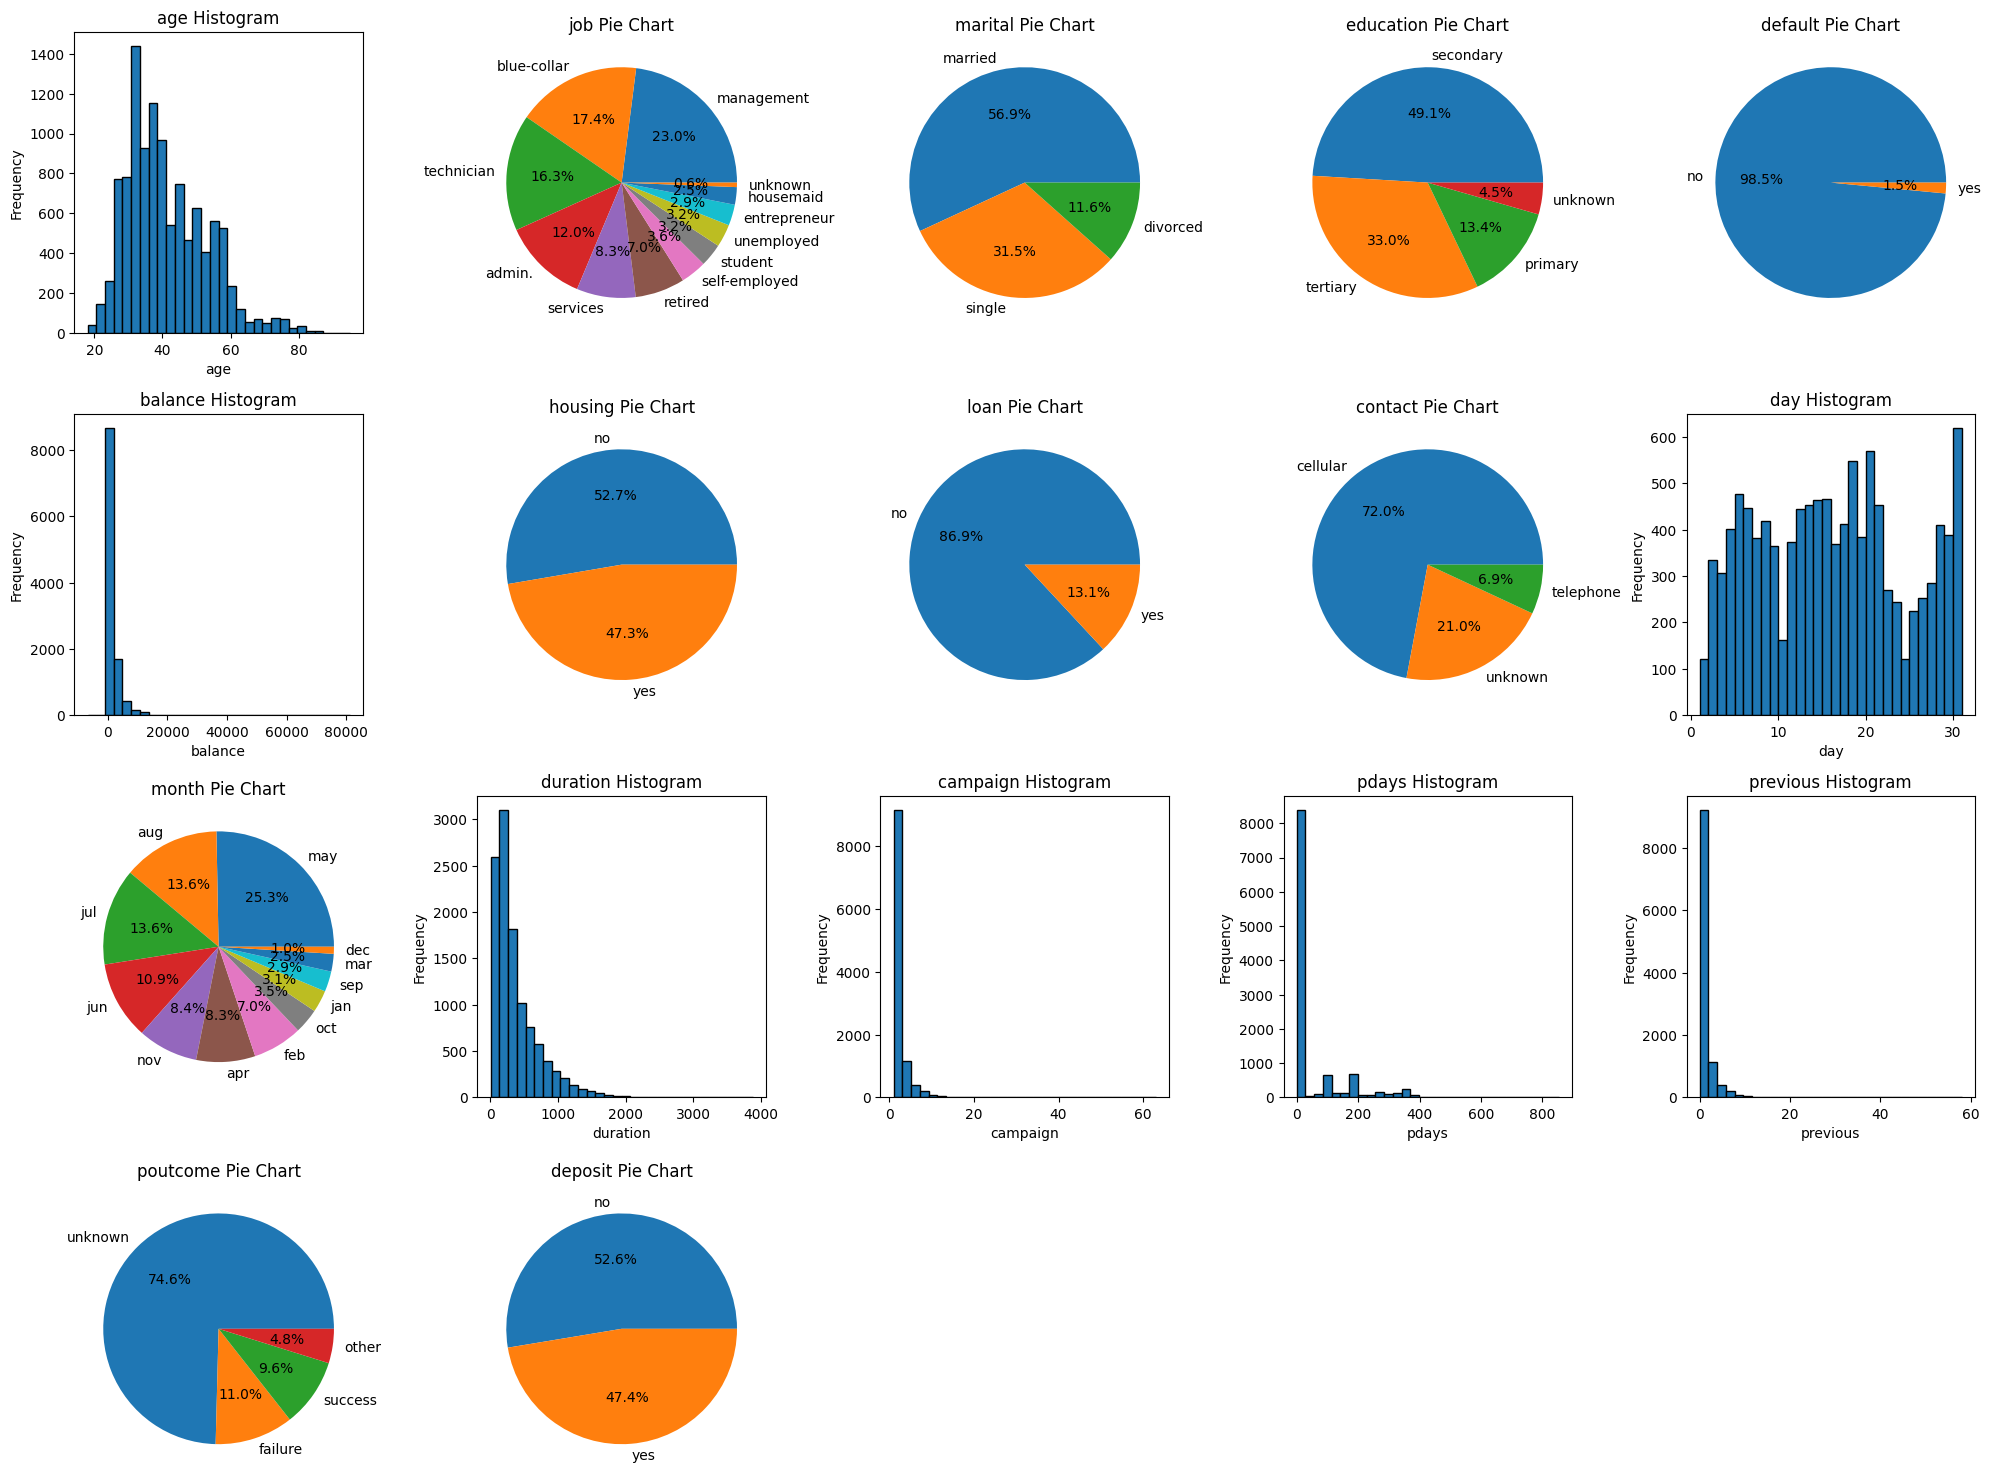

In [11]:
df_categories=df.select_dtypes(include='object')
df_numerical=df.select_dtypes(include="int64")

fig = plt.figure(figsize=(20,15))
index = 0
for col in df :
    index+=1
    ax=fig.add_subplot(4,5,index)
    if col in df_categories.columns :
        sizes=df[col].value_counts(normalize=True)
        labels=sizes.index
        ax.pie(x=sizes, labels=labels, autopct='%1.1f%%')
        ax.set_title(f'{col} Pie Chart')
    else:
        ax.hist(df[col], bins=30, edgecolor='black')
        ax.set_title(f'{col} Histogram')
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)

plt.tight_layout()

plt.show()


#### 2. Outliers for numerical variables

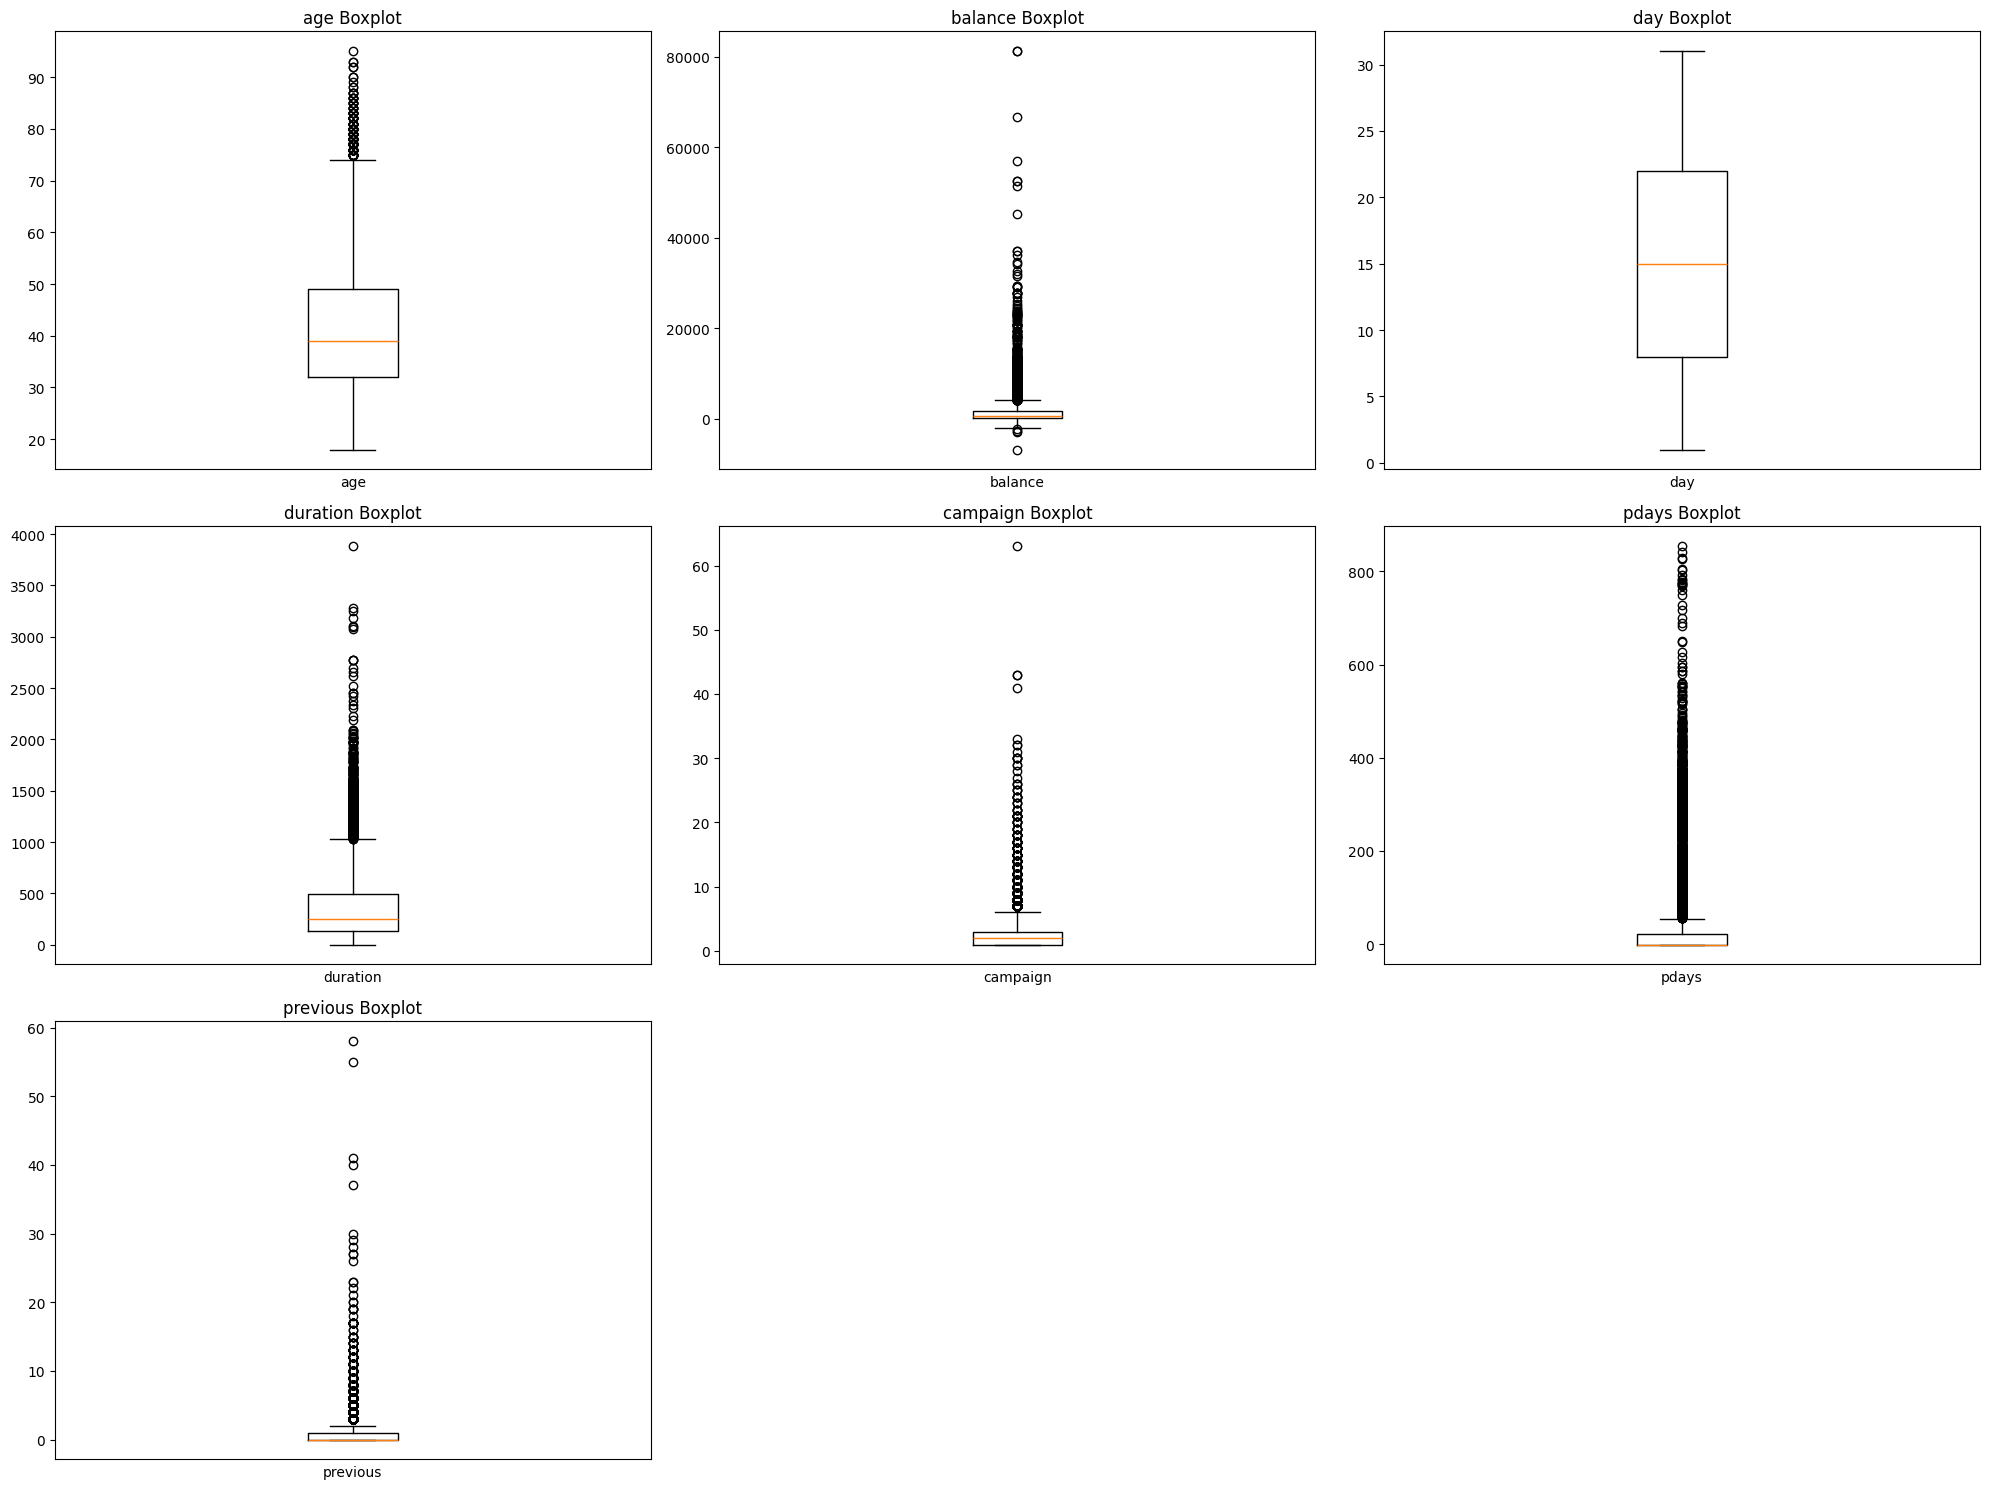

In [12]:
fig = plt.figure(figsize=(20,15))
index=0
for col in df_numerical :
    index+=1
    ax=fig.add_subplot(3,3,index)
    ax.boxplot(df[col])
    ax.set_title(f'{col} Boxplot')
    ax.set_xlabel(col, fontsize=10)
    ax.set_xticks([])

plt.tight_layout()

plt.show()


In [14]:
for col in df_numerical.columns :
    q3 = df_numerical[col].quantile(q=0.75)
    q1 = df_numerical[col].quantile(q=0.25)
    iqr=q3-q1
    extreme_values_max=[]
    extreme_values_min=[]
    for n in df_numerical[col] :
        if n > q3 + 1.5 * iqr :
            extreme_values_max.append(n)
        if n < q1 - 1.5 * iqr :
            extreme_values_min.append(n)
    n_extreme_values_max=len(extreme_values_max)
    n_extreme_values_min=len(extreme_values_min)
    n_extreme_values_max_distinct=len(set(extreme_values_max))
    n_extreme_values_min_distinct=len(set(extreme_values_min))
    print(f"Column {col} :\nExtreme values - low : {n_extreme_values_min} - disctinct : {n_extreme_values_min_distinct}\n{extreme_values_min}\nExtreme values - high : {n_extreme_values_max} - distinct : {n_extreme_values_max_distinct}\n{extreme_values_max}\n----\n")

Column age :
Extreme values - low : 0 - disctinct : 0
[]
Extreme values - high : 171 - distinct : 19
[75, 85, 90, 85, 83, 76, 83, 77, 77, 76, 78, 95, 78, 75, 76, 85, 83, 79, 82, 79, 75, 76, 82, 77, 86, 76, 79, 83, 77, 84, 83, 75, 77, 76, 77, 87, 76, 92, 78, 82, 76, 77, 76, 81, 75, 80, 87, 76, 82, 77, 76, 81, 75, 78, 80, 86, 79, 79, 81, 75, 84, 87, 85, 79, 92, 77, 81, 80, 77, 78, 76, 80, 77, 76, 75, 82, 80, 78, 90, 83, 80, 82, 80, 84, 86, 75, 76, 77, 76, 77, 80, 77, 78, 75, 84, 78, 80, 80, 79, 86, 93, 82, 82, 77, 93, 77, 75, 80, 84, 75, 78, 81, 81, 77, 78, 75, 77, 77, 77, 78, 77, 79, 78, 75, 80, 76, 78, 79, 75, 77, 79, 78, 88, 77, 85, 78, 80, 82, 75, 77, 78, 78, 76, 81, 77, 75, 80, 80, 80, 76, 77, 81, 76, 76, 87, 81, 78, 82, 83, 77, 77, 75, 76, 89, 80, 77, 77, 88, 77, 78, 86]
----

Column balance :
Extreme values - low : 4 - disctinct : 4
[-3058, -2282, -6847, -2712]
Extreme values - high : 1051 - distinct : 832
[5090, 7180, 5291, 4580, 10576, 4393, 4438, 4170, 4822, 4499, 4665, 5773, 6

#### 3. Distribution based on the deposit variable

In [15]:
count_data_a = df.groupby(['job', 'deposit']).size().unstack(fill_value=0)
count_data_a

deposit,no,yes
job,,
admin.,703,631
blue-collar,1236,708
entrepreneur,205,123
housemaid,165,109
management,1265,1301
retired,262,516
self-employed,218,187
services,554,369
student,91,269


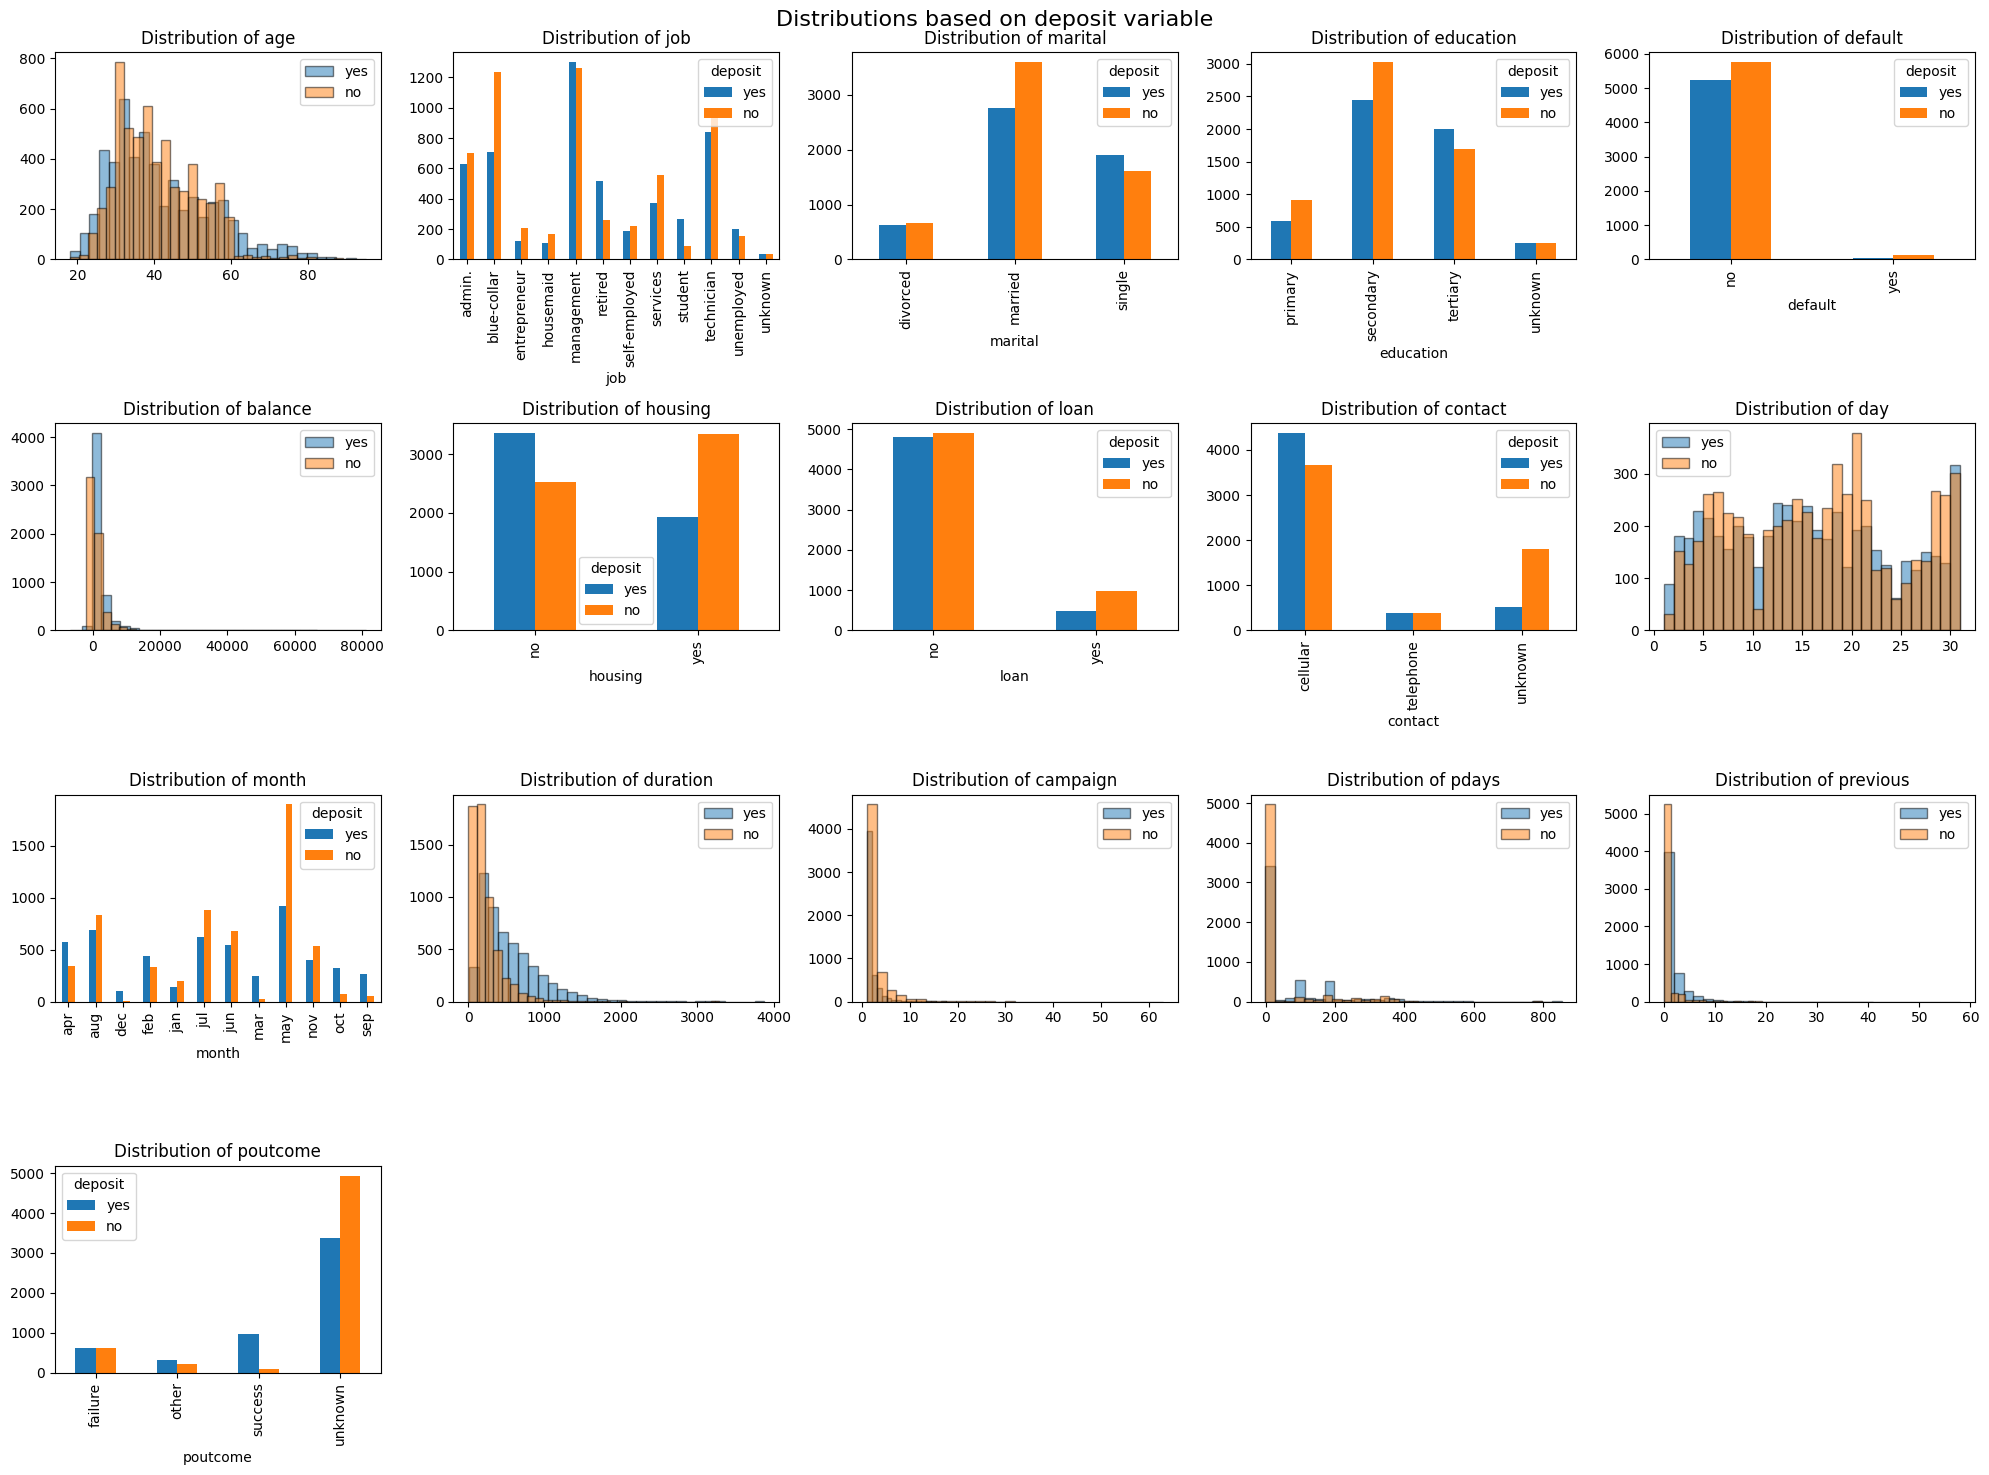

In [16]:
fig = plt.figure(figsize=(20,15))
fig.suptitle('Distributions based on deposit variable', fontsize=16)
index = 0
df_X=df.drop('deposit', axis=1)
for col in df_X :
    index+=1
    ax=fig.add_subplot(4,5,index)
    if col in df_categories.columns :
        count_data = df.groupby([col, 'deposit']).size().unstack(fill_value=0)
        sort_col=['yes','no']
        count_data=count_data[sort_col]
        count_data.plot(kind='bar', stacked=False, ax=ax)
        ax.set_title(f'Distribution of {col}')
    else:
        for value in df['deposit'].unique():
            ax.hist(df[df['deposit']==value][col], alpha=0.5, label=value, bins=30, edgecolor='black')
            ax.set_title(f'Distribution of {col}')
            ax.legend()


plt.tight_layout()

plt.show()

#### 4. Relations between variables

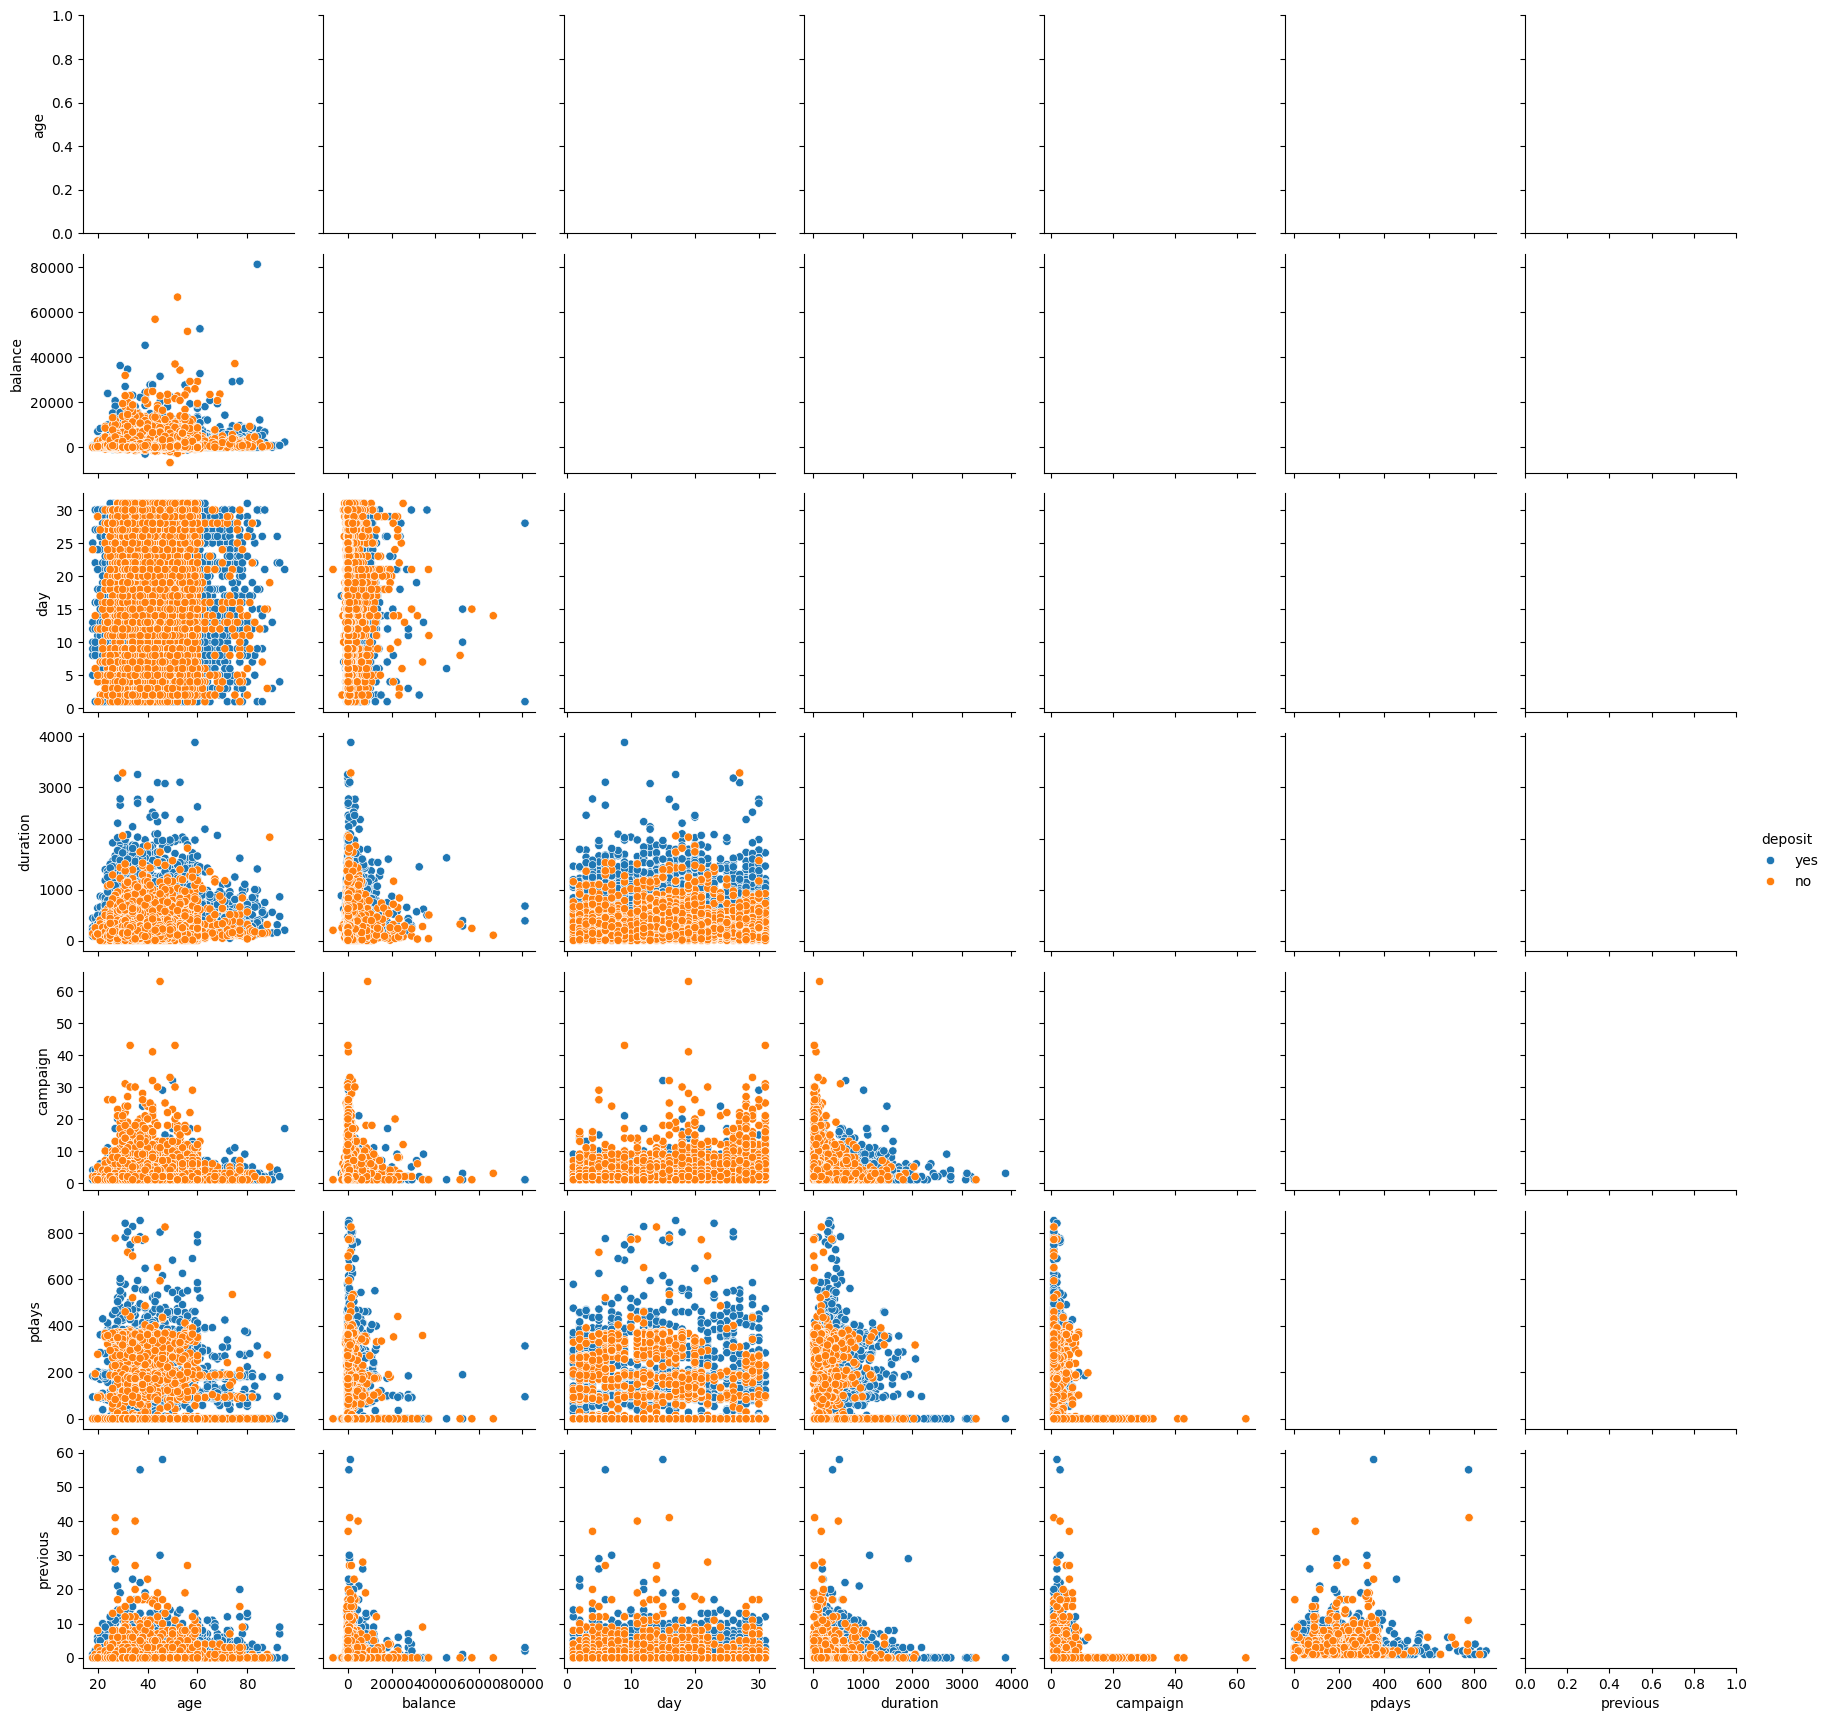

In [64]:
g = sns.PairGrid(df, hue='deposit')

g.map_lower(sns.scatterplot)
g.add_legend()

plt.show()


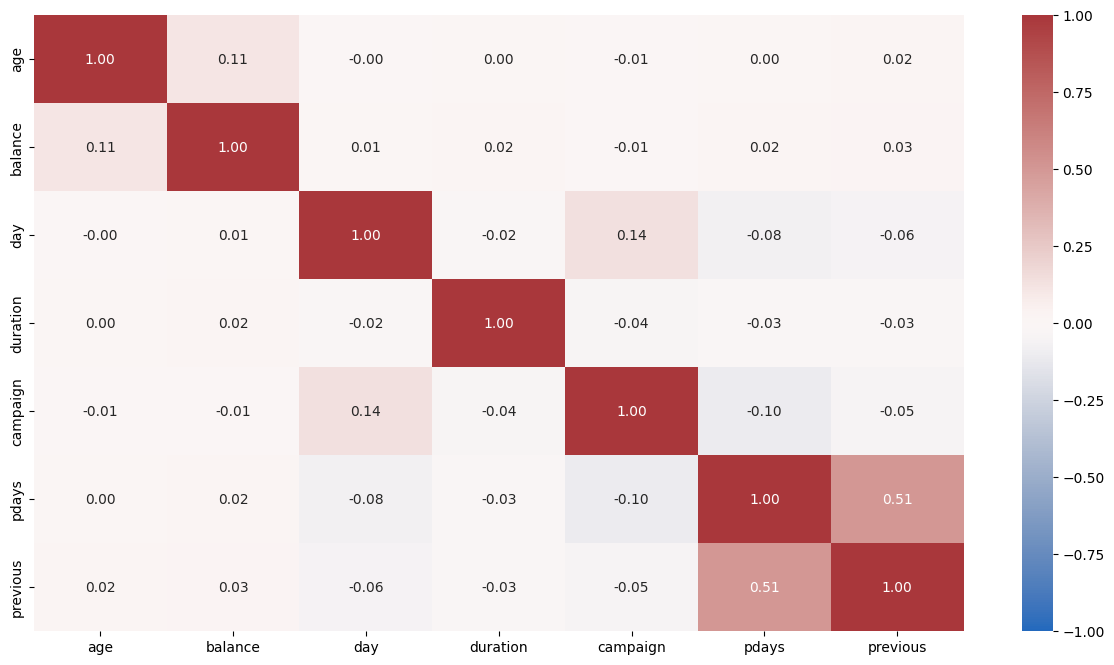

In [30]:
correlation_matrix = df_numerical.corr()

fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap="vlag", center=0, fmt=".2f", vmin=-1,vmax=1, ax=ax)
plt.show()

In [34]:
education_map = {'unknown': 0, 'primary' : 1, 'secondary' : 2, 'tertiary' : 3}
boolean_map = {'yes': 1, 'no' : 0}

df_encoded = df.copy()
df_encoded['education'] = df_encoded['education'].map(education_map)
df_encoded['default'] = df_encoded['default'].map(boolean_map)
df_encoded['housing'] = df_encoded['housing'].map(boolean_map)
df_encoded['loan'] = df_encoded['loan'].map(boolean_map)
df_encoded['deposit'] = df_encoded['deposit'].map(boolean_map)

df_encoded=df_encoded.select_dtypes('int64')
df_encoded

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
0,59,2,0,2343,1,0,5,1042,1,-1,0,1
1,56,2,0,45,0,0,5,1467,1,-1,0,1
2,41,2,0,1270,1,0,5,1389,1,-1,0,1
3,55,2,0,2476,1,0,5,579,1,-1,0,1
4,54,3,0,184,0,0,5,673,2,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,0,1,1,0,20,257,1,-1,0,0
11158,39,2,0,733,0,0,16,83,4,-1,0,0
11159,32,2,0,29,0,0,19,156,2,-1,0,0
11160,43,2,0,0,0,1,8,9,2,172,5,0


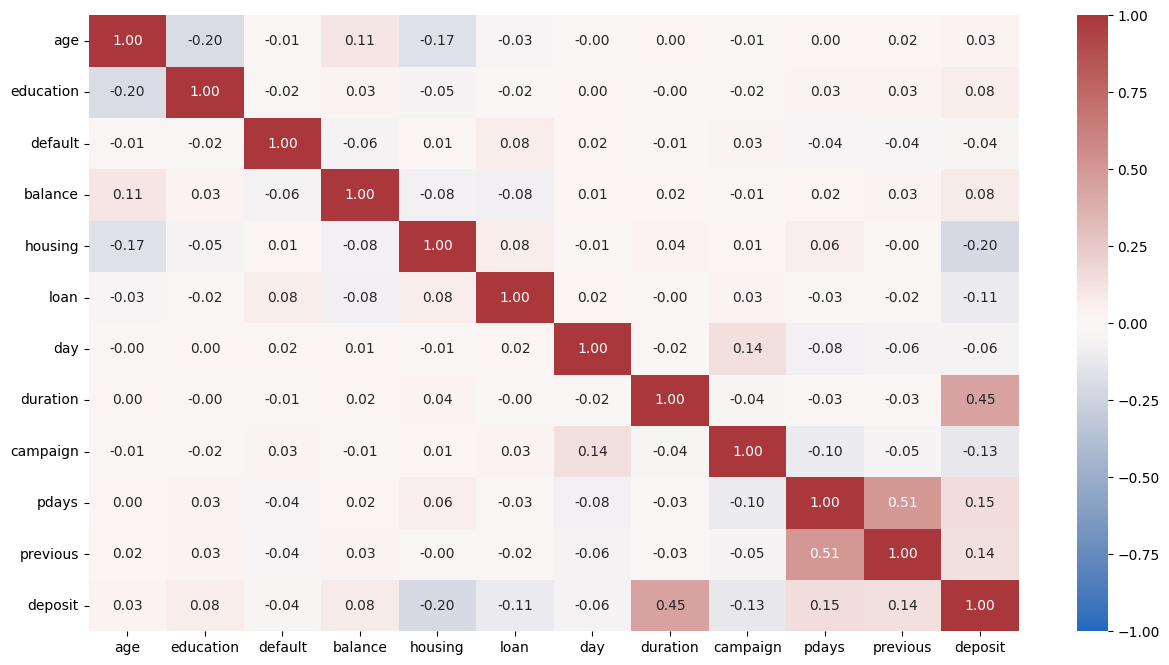

In [35]:
correlation_matrix = df_encoded.corr()

fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap="vlag", center=0, fmt=".2f", vmin=-1,vmax=1, ax=ax)
plt.show()

### C. Independance tests

In [46]:
alpha = 0.05
for col1, col2 in combinations(df_numerical.columns, 2):
    correlation, p_value = pearsonr(df_numerical[col1], df_numerical[col2])
    if p_value < alpha :
        null_hyp = "Rejected"
    else :
        null_hyp = "Failed to be rejected"
    print(f'Pearson correlation coefficient between {col1} and {col2} : {correlation}\nP-value: {p_value}\nThe null hypothesis which states that there is no effect or no relationship between the variables is {null_hyp}\n')


Pearson correlation coefficient between age and balance : 0.11229988859873163
P-value: 1.1713921278539271e-32
The null hypothesis which states that there is no effect or no relationship between the variables is Rejected

Pearson correlation coefficient between age and day : -0.0007624209205459918
P-value: 0.9358069565837362
The null hypothesis which states that there is no effect or no relationship between the variables is Failed to be rejected

Pearson correlation coefficient between age and duration : 0.00018922807371432072
P-value: 0.9840515280223197
The null hypothesis which states that there is no effect or no relationship between the variables is Failed to be rejected

Pearson correlation coefficient between age and campaign : -0.005277936156040517
P-value: 0.5771467043678863
The null hypothesis which states that there is no effect or no relationship between the variables is Failed to be rejected

Pearson correlation coefficient between age and pdays : 0.0027738343117694663
P-val

In [54]:
alpha = 0.05
for col1, col2 in combinations(df_categories.columns, 2):
    crosstab=pd.crosstab(df_categories[col1],df_categories[col2])
    statistic=chi2_contingency(crosstab)[0]
    p_value=chi2_contingency(crosstab)[1]
    if p_value < alpha :
        null_hyp = "Rejected"
    else :
        null_hyp = "Failed to be rejected"
    print(f'Chi2 statistic between {col1} and {col2} : {statistic}\nP-value: {p_value}\nThe null hypothesis which states that there is no effect or no relationship between the variables is {null_hyp}\n')

Chi2 statistic between job and marital : 1255.1741115951036
P-value: 7.350991816548842e-252
The null hypothesis which states that there is no effect or no relationship between the variables is Rejected

Chi2 statistic between job and education : 7191.10998362013
P-value: 0.0
The null hypothesis which states that there is no effect or no relationship between the variables is Rejected

Chi2 statistic between job and default : 30.95897743096264
P-value: 0.0011181856351128673
The null hypothesis which states that there is no effect or no relationship between the variables is Rejected

Chi2 statistic between job and housing : 1075.428403058402
P-value: 1.1116226821509503e-223
The null hypothesis which states that there is no effect or no relationship between the variables is Rejected

Chi2 statistic between job and loan : 213.77294470444144
P-value: 1.0223224783363543e-39
The null hypothesis which states that there is no effect or no relationship between the variables is Rejected

Chi2 stat

In [63]:
alpha=0.05
for col1 in df_numerical.columns:
    for col2 in df_categories.columns:
        result = statsmodels.formula.api.ols('df[col1] ~ df[col2]', data=df).fit()
        table = statsmodels.api.stats.anova_lm(result)
        F_stat = table['F'].iloc[0]
        PRF=table['PR(>F)'].iloc[0]
        if PRF < alpha :
            null_hyp = "Rejected"
        else :
            null_hyp = "Failed to be rejected"
        print(f'F statistic between {col1} and {col2} : {F_stat}\nPR(>F): {PRF}\nThe null hypothesis which states that there is no effect or no relationship between the variables is {null_hyp}\n')

F statistic between age and job : 590.6198232891209
PR(>F): 0.0
The null hypothesis which states that there is no effect or no relationship between the variables is Rejected

F statistic between age and marital : 1613.106691123017
PR(>F): 0.0
The null hypothesis which states that there is no effect or no relationship between the variables is Rejected

F statistic between age and education : 251.9682514894165
PR(>F): 3.205321174670293e-158
The null hypothesis which states that there is no effect or no relationship between the variables is Rejected

F statistic between age and default : 1.4568507822117882
PR(>F): 0.22745744200950127
The null hypothesis which states that there is no effect or no relationship between the variables is Failed to be rejected

F statistic between age and housing : 326.91533207486367
PR(>F): 4.79497665315699e-72
The null hypothesis which states that there is no effect or no relationship between the variables is Rejected

F statistic between age and loan : 11.02